In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog
from oclog.openset.opensetv12 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=1500,
                                                           debug=False,
                                                          designated_ukc_cls=5)

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 1200, val_0:, 150, test_0:, 150, train_1:, 1200, val_1:, 150, test_1:, 150, train_2:, 1200, val_2:, 150, test_2:, 150, class 5 is added as ukc
ukc_5:, 150
length of train_data - (num_seq_per_cls * num_class)// batch size: 112
get_bgdata  num_classses: 3 and self.num_classes: 3


vocab_size: 50
got all the dataset
2022-05-10 20:50:18.773036
starting to create ptmodel automatically
epoch: 1/50, train_loss: 4.554779052734375, train_acc: 51.79, F1_train: 0.416 val_loss: 4.554779052734375, val_acc: 63.39,, F1_val: 0.5288
epoch: 2/50, train_loss: 3.313199758529663, train_acc: 50.42, F1_train: 0.4161 val_loss: 3.313199758529663, val_acc: 62.05,, F1_val: 0.5214
train score not improving  going to wait state 1
val score not improving  going to wait state 1
epoch: 3/50, train_loss: 2.801558256149292, train_acc: 69.28, F1_train: 0.6886 val_loss: 2.801558256149292, val_acc: 94.64,, F1_val: 0.9453
epoch: 4/50, train_loss: 2.362959384918213, train_acc: 58.84, F1_train: 0.56 val_loss: 2.362959384918213, val_acc: 66.74,, F1_val: 0.5933
train score not improving  going to wait state 1
val score not improving  going to wait state 1
epoch: 5/50, train_loss: 2.132949113845825, train_acc: 84.71, F1_train: 0.8452 val_loss: 2.132949113845825, val_acc: 99.33,, F1_val: 0.9933
epoch: 6

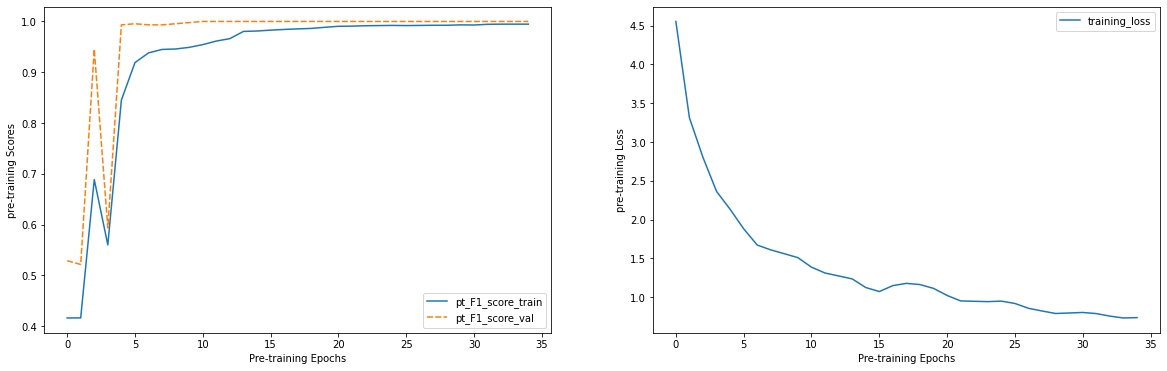

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


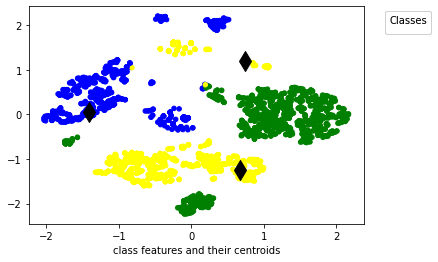

run_id:  2022-05-10_20_57_23.684957_b0c143a5d07511ec86e4ac8247733f47


In [4]:
tf.random.set_seed(1234)
np.random.seed(1234) 
res = oset.ptmodel_custom_train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=50, oc_epochs=2,
                save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=False,
                               halpha=0.7, hbeta=1.5, )